In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv('test.csv')

In [3]:
df_test.shape

(418, 11)

In [4]:
df_train.info()  #there are nan values in cabin and age column which we have to sort out later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_test.info() #this donot have survived column which we have to test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
#import seaborn as sns
#sns.set()

In [7]:
#sns.countplot(df_train['Sex'])

In [8]:
#sns.countplot(df_train['Parch'])

In [9]:
#sns.countplot(df_test['Parch'])

#HERE WE SEE parch HAS more COLUMNS in TEST data which will become a problem in our dataset later
#So I remove 9 and put 6 in place 

In [10]:
#sns.countplot(df_train['Survived'], hue='Sex', data = df_train)  #more males are dead than females

In [11]:
#sns.countplot(df_train['Survived'], hue= 'Pclass', data= df_train) #pclass is ticket class

#by this graph we see that more people survived from 1st class ticket 

In [12]:
#sns.heatmap((df_train.isnull()) )

#here in this heatmap we see that there are missing values in age and cabin
#and we have to remove that

In [13]:
#sns.heatmap((df_test.isnull()) )
#in test graph too

In [14]:
age = df_train['Age']

In [15]:
#sns.distplot(age.dropna(), bins=50)

In [16]:
#sns.countplot(df_train['SibSp'], data=df_train, hue='Survived') #number of siblings of spouses

In [17]:
#sns.boxplot(data = df_train, y='Age', x= 'Pclass')

#here in boxplot we can see the mean age survived according to each class
#so mean age of class 1 is approx 37
#                     2           29
#                     3           24

In [18]:
#sns.boxplot(data = df_test, y='Age', x= 'Pclass')



In [19]:
#Function To Replace Nan Age by The Mean According to Pclass
#AS WE HAVE SEEN IN THE BOX PLOT ABOVE



def replace (cols):
    age = cols[0]
    Pclass = cols[1]
    if pd.isnull(age):
        if Pclass == 1:
            return 37          #mean from boxplot
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    
    else: 
        return age
    
    

In [20]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(replace , axis =1)

In [21]:
df_train['Age']

#ie no nan values

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [22]:
df_test['Age'] = df_test[['Age', 'Pclass']].apply(replace , axis =1)

#replacing nan values of test values with mean informATIOn from train boxplot

In [23]:
df_test['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    24.0
414    39.0
415    38.5
416    24.0
417    24.0
Name: Age, Length: 418, dtype: float64

In [24]:
fare = df_train['Fare']

In [25]:
type(fare)

pandas.core.series.Series

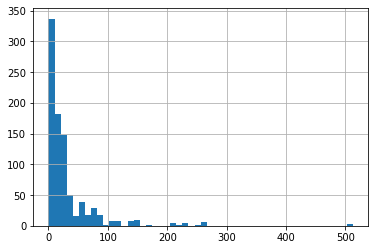

In [26]:
#-------------#GRAPH USING PANDA ONLY------------------
fare.hist(bins=50)
#-------------------------------------------------------------------

In [27]:
#CREATING DUMMY VAR FOR TRAINING DATA

sex1 = df_train['Sex']
sex1 = pd.get_dummies(sex1, drop_first=True )


pclass1 = df_train['Pclass']
pclass1 = pd.get_dummies(pclass1, drop_first=True)
                     

sibsp1 = df_train['SibSp']
sibsp1 = pd.get_dummies(sibsp1, drop_first=True)
                     

parch1 = df_train['Parch']
parch1 = pd.get_dummies(parch1, drop_first=True)
                     

embarked1 = df_train['Embarked']
embarked1 = pd.get_dummies(embarked1, drop_first=True)


age1 = df_train['Age']

In [28]:
#CREATING DUMMY VAR FOR TEST DATA

sex2 = df_test['Sex']
sex2 = pd.get_dummies(sex2, drop_first=True )


pclass2 = df_test['Pclass']
pclass2 = pd.get_dummies(pclass2, drop_first=True)
                     

sibsp2 = df_test['SibSp']
sibsp2 = pd.get_dummies(sibsp2, drop_first=True)
                     

parch2 = df_test['Parch']
parch2 = pd.get_dummies(parch2, drop_first=True)
                     

embarked2 = df_test['Embarked']
embarked2 = pd.get_dummies(embarked2, drop_first=True)

age2 = df_test['Age']

In [29]:
#Survived to be PREDICTED


y= df_train['Survived']

In [30]:
X1 = pd.concat([age1 , embarked1, parch1, sibsp1, pclass1, sex1], axis =1)

In [31]:
X1.head(5) 
#all are converted

,Age,Q,S,1,2,3,4,5,6,1,2,3,4,5,8,2,3,male
0,22.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
1,38.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,26.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,35.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,35.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [32]:
X2 = pd.concat([age2 , embarked2, parch2, sibsp2, pclass2, sex2], axis =1)

In [33]:
X2.head(5)

,Age,Q,S,1,2,3,4,5,6,1,2,3,4,5,8,2,3,male
0,34.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,47.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,62.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,27.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,22.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X1,y)   
#here we didnt use train_test_split because we have diff training and testing data

X2.shape

Y_pred = model.predict(X2)


In [34]:
from keras.models import Sequential

model = Sequential()

from keras.layers import Dense

model.add(Dense(units= 6 , input_dim = 18, activation= "relu"))  

#number of dense =  number of hidden layers
#units = number of neurons in that hidden layer
#input_dim number of inputs ie number of columns in X
#activation function to keep values in 0 and 1

model.add(Dense(units= 6 , activation= "relu")) 

model.add(Dense(units= 8 , activation= "relu")) 

#output layer ie y output only one neuron

model.add(Dense(units = 1 , activation = 'sigmoid'))

from keras.optimizers import Adam

model.compile(optimizer= Adam(learning_rate=0.000001), loss= "binary_crossentropy")

#loss for back propagation step

model.fit( X1, y , epochs = 50 )

y_pred = model.predict(X2)

#we want loss to get minimized

#df_loss = pd.DataFrame(model.history.history)

Using TensorFlow backend.


Epoch 1/50
891/891 [==============================] - 0s 215us/step - loss: 1.1873
Epoch 2/50
891/891 [==============================] - 0s 49us/step - loss: 1.1855
Epoch 3/50
891/891 [==============================] - 0s 45us/step - loss: 1.1836
Epoch 4/50
891/891 [==============================] - 0s 47us/step - loss: 1.1818
Epoch 5/50
891/891 [==============================] - 0s 42us/step - loss: 1.1800
Epoch 6/50
891/891 [==============================] - 0s 41us/step - loss: 1.1782
Epoch 7/50
891/891 [==============================] - 0s 45us/step - loss: 1.1764
Epoch 8/50
891/891 [==============================] - 0s 39us/step - loss: 1.1745
Epoch 9/50
891/891 [==============================] - 0s 39us/step - loss: 1.1727
Epoch 10/50
891/891 [==============================] - 0s 47us/step - loss: 1.1709
Epoch 11/50
891/891 [==============================] - 0s 41us/step - loss: 1.1691
Epoch 12/50
891/891 [==============================] - 0s 38us/step - loss: 1.1673
Epoch 13/50


In [35]:
Y_pred = model.predict(X2)


In [38]:
import numpy as np
Y_pred = np.around(Y_pred)
Y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
#df1= pd.DataFrame(Y_pred)

In [ ]:
#df1=df1.astype(int)

In [39]:
df_test['Survived'] = Y_pred#saving our predicted data to survived column of test

In [40]:
df_test[['PassengerId', 'Survived']].to_csv('PREDICTED_TITANIC_Survival_DATA_vNN2.csv', index=False)